
##Importing Libraries and the Dataset

In [ ]:
#import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
#get path
path="/content/winequalityN.csv"

In [ ]:

#read csv file
Df_dataset = pd.read_csv(path)

##Exploring the dataset

In [ ]:
#To view the first few rows,
Df_dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#To view the last few rows,
Df_dataset.tail()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
#get the column headings of the data set
Df_dataset.columns.values

array(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [ ]:
#Explore the data types of the columns
Df_dataset.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
#describe the data set
Df_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


##Handling missing data

In [ ]:
#check for the columns which have missing values more than 30%
col_num=0
TotalObjects =Df_dataset.shape[0]
print ("Column\t\t\t\t\t Null Values%")
for x in Df_dataset:
    nullCount =Df_dataset[x].isnull().sum();
    nullPercent = nullCount*100 / (TotalObjects)
    if nullCount > 0 and nullPercent > 30 :
       col_num=col_num+1
       Df_dataset.drop(x, axis=1,inplace=True)
       print(str(x)+"\t\t\t\t\t "+str(nullPercent))
print ("A total of "+str(col_num)+" deleted !") 

Column					 Null Values%
A total of 0 deleted !


In [ ]:
#To get an idea about the null values
Df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
#Getting the null value count
Df_dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

##Replacing null values

In [ ]:

#replace null values using mean and value counts
Df_dataset = Df_dataset.apply(lambda x: x.fillna(x.mean())
                  if x.dtype =='float'
                  else x.fillna(x.value_counts().index[0]))


In [ ]:
#Getting the null value count
Df_dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##Dealing with categorical data

In [ ]:
pd.unique(Df_dataset['type'].values) 


array(['white', 'red'], dtype=object)

In [ ]:
def getNumber(str):
 if str=="white":
    return 1
 else:
    return 2
Df_dataset["type"]= Df_dataset["type"].apply(getNumber)

In [ ]:
Df_dataset

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,2,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,2,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,2,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,2,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


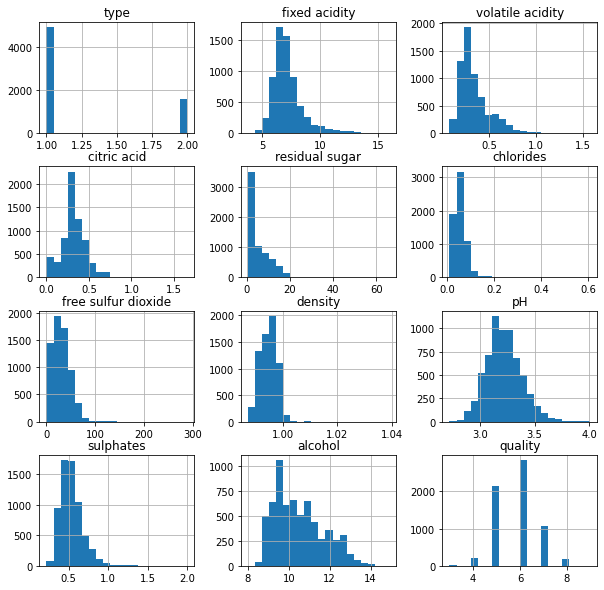

In [ ]:
Df_dataset.hist(bins=20, figsize=(10, 10))
plt.show()


Exploratory Data Analysis

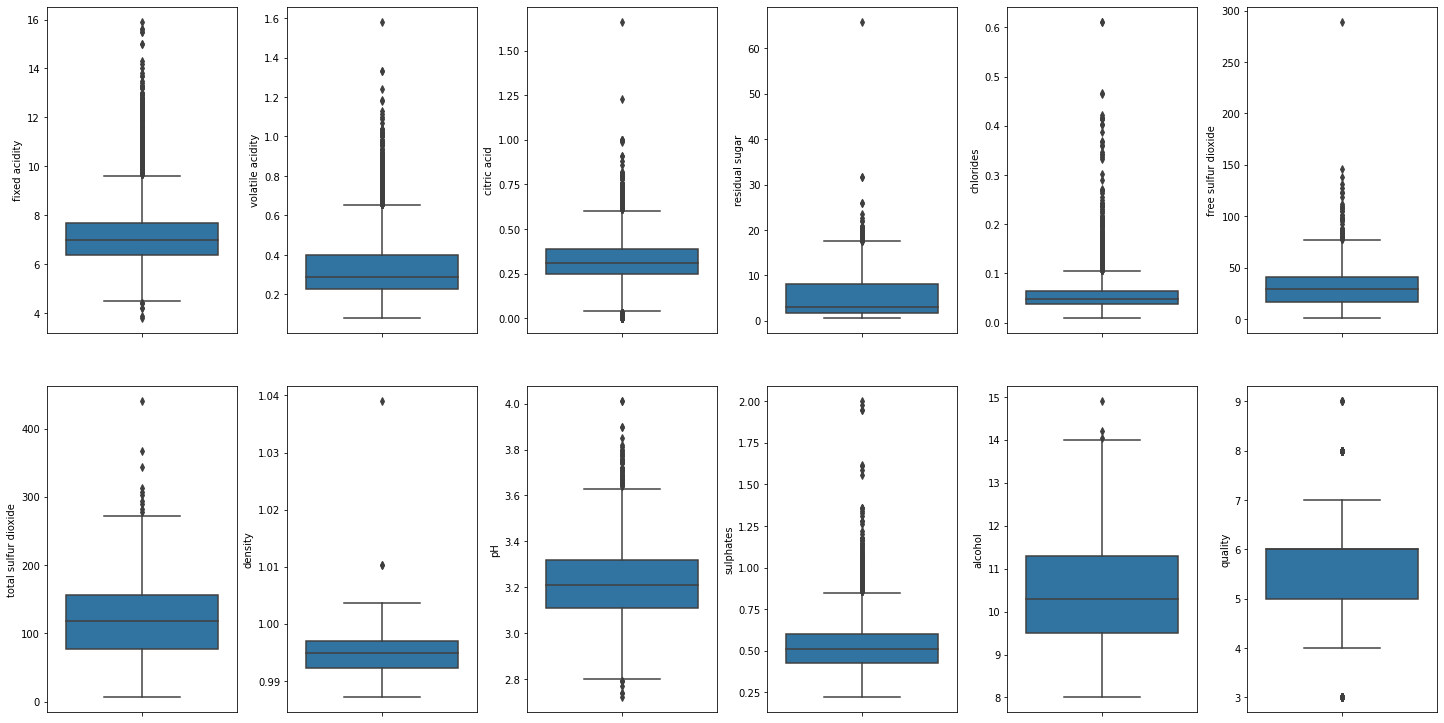

In [ ]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in Df_dataset.items():
    if col != 'type':
        sns.boxplot(y=col, data=Df_dataset, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

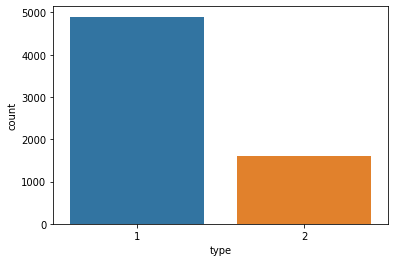

In [ ]:
sns.countplot(Df_dataset['type'])

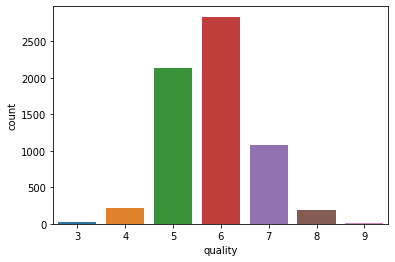

In [ ]:
sns.countplot(Df_dataset['quality'])

Coorelation Matrix

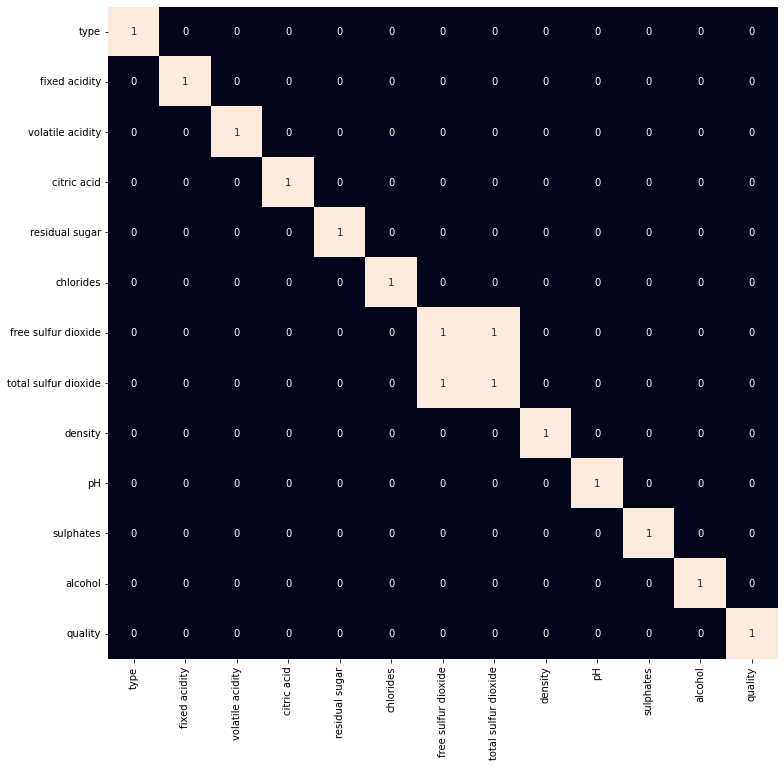

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(Df_dataset.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [ ]:
Df_dataset= Df_dataset.drop('total sulfur dioxide', axis=1)

Model Training

In [ ]:
#split the dataset before balancing the class.
X = Df_dataset.drop(columns=[ 'quality'])
y = Df_dataset['quality']

In [ ]:
X.columns.values

array(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'], dtype=object)

In [ ]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Class Imbalancement

In [ ]:
from imblearn.over_sampling import SMOTE
#oversample function generates new features from minority classes.
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X, y)

In [ ]:
# shows the count of data values for each class.
y.value_counts()

6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: quality, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:

#moralizing the data before training to achive stable and fast training
norm = MinMaxScaler()
xtrain = norm.fit_transform(x_train)
xtest = norm.transform(x_test)

In [ ]:
print(X.shape, xtrain.shape, xtest.shape)

(19852, 11) (14889, 11) (4963, 11)


In [ ]:
# classification model 1 -Random forest 
classifier1 = RandomForestClassifier()

In [ ]:
#training the model
classifier1.fit(xtrain, y_train)



RandomForestClassifier()

In [ ]:
#accuracy score
print("Train Accuracy:", classifier1.score(xtrain, y_train) * 100)
print("Test Accuracy:", classifier1.score(xtest, y_test) * 100)
    

Train Accuracy: 100.0
Test Accuracy: 88.03143260124925


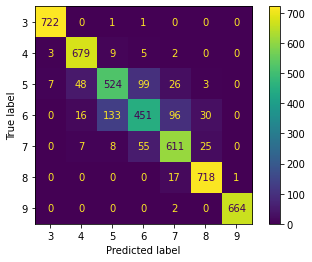

In [ ]:
metrics.plot_confusion_matrix(classifier1, xtest, y_test)
plt.show()

In [ ]:
print(metrics.classification_report(y_test,classifier1.predict(xtest)))

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       724
           4       0.91      0.97      0.94       698
           5       0.78      0.74      0.76       707
           6       0.74      0.62      0.67       726
           7       0.81      0.87      0.84       706
           8       0.93      0.98      0.95       736
           9       1.00      1.00      1.00       666

    accuracy                           0.88      4963
   macro avg       0.88      0.88      0.88      4963
weighted avg       0.88      0.88      0.88      4963



In [ ]:
input_data = (1,1,	4.0	,0.270,	0.36,	20.7	,0.045	,45.0	,0.08,	1.00100	,3.00)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier1.predict(input_data_reshaped)
print(prediction)

if (prediction[0] < 6):
  print('The wine quality is not good')
else:
  print('The wine quality is good')

[5]
The wine quality is not good
